In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

plt.style.use('ggplot')

In [76]:
df = pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,No,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,Yes,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,Yes,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,Yes,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1.0,No,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [77]:
df.dtypes

Loan_ID               object
Gender               float64
Married               object
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [78]:
df.describe()

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,592.000000,614.000000,564.000000
mean,0.817590,0.744300,0.781759,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.842199
std,0.386497,1.009623,0.413389,0.340446,6109.041673,2926.248369,85.587325,64.428629,0.364878
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.000000,1.000000
max,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [79]:
df.shape

(614, 13)

In [80]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

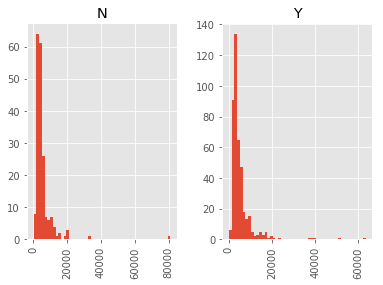

In [81]:
df[['Loan_Status','ApplicantIncome']].hist(bins=50, by='Loan_Status')
plt.show()

In [82]:
coapplicants = df['CoapplicantIncome']
coapplicants.head()

0       0.0
1    1508.0
2       0.0
3    2358.0
4       0.0
Name: CoapplicantIncome, dtype: float64

In [83]:
coapplicants = coapplicants.apply(lambda x: 'N' if x==0 else 'Y')

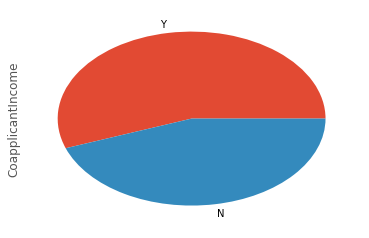

In [84]:
coapplicants.value_counts().plot(kind='pie')
plt.show()

In [85]:
#remover coluna
df.drop('Loan_ID', axis=1, inplace=True)

In [86]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,No,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1.0,Yes,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,Yes,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,Yes,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1.0,No,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [87]:
df.columns = ['is_Male', 'is_Married', 'Dependents', 'is_Graduated', 'is_Self_Employed', 'AplicantIncome', 'CoapplicantIncome',
             'LoanAmount', 'Loan_Amount_Term', 'has_Credit_History', 'Property_Area', 'Loan_Status']
#alterar nome da coluna

In [88]:
df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,AplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Property_Area,Loan_Status
0,1.0,No,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1.0,Yes,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,Yes,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,Yes,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1.0,No,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [89]:
mapper = {'Yes':1, 'No':0}
df['is_Married'] = df['is_Married'].map(mapper)

In [90]:
mapper2 = {'Y':1, 'N':0}
df['Loan_Status'] = df['Loan_Status'].map(mapper2)

In [91]:
df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,AplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1


In [92]:
df.isnull().sum().sort_values(ascending=False)

has_Credit_History    50
LoanAmount            22
is_Married             3
Loan_Status            0
Property_Area          0
Loan_Amount_Term       0
CoapplicantIncome      0
AplicantIncome         0
is_Self_Employed       0
is_Graduated           0
Dependents             0
is_Male                0
dtype: int64

In [93]:
df.dropna(subset=['is_Married'], inplace=True)
#remover dados nulos de uma coluna

In [94]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
#preencher nulos

In [95]:
df['has_Credit_History'].value_counts()

1.0    472
0.0     89
Name: has_Credit_History, dtype: int64

In [96]:
df['has_Credit_History'].fillna(1, inplace=True)

In [97]:
df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,AplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,146.369492,360.0,1.0,Urban,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,Urban,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,Urban,1


In [98]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [99]:
df = pd.get_dummies(df, columns=['Property_Area'])

In [100]:
df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,AplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,0.0,1,0.0,5849,0.0,146.369492,360.0,1.0,1,0,0,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,1,0,0,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,1,0,0,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,1,0,0,1


In [101]:
from matplotlib.colors import ListedColormap

flatui = ["#FF0000", "#E34646", "#FFFFFF", "#E34646", "#FF0000"]
my_cmap = ListedColormap(sns.color_palette(flatui).as_hex())

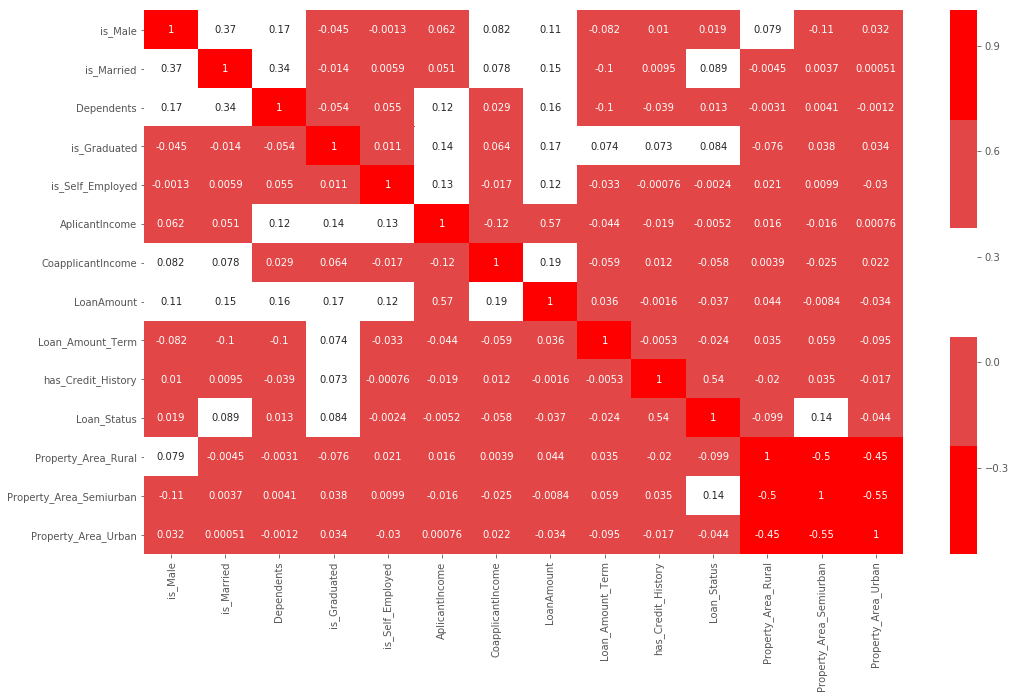

In [102]:
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(), annot=True, cmap=my_cmap)
plt.show()

In [103]:
df['TotalIncome'] = df['AplicantIncome'] + df['CoapplicantIncome']

In [104]:
df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,AplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TotalIncome
0,1.0,0.0,0.0,1,0.0,5849,0.0,146.369492,360.0,1.0,1,0,0,1,5849.0
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,6091.0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,1,0,0,1,3000.0
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,1,0,0,1,4941.0
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,1,0,0,1,6000.0


In [105]:
df['AplicantIncome'] = np.log(df['AplicantIncome'])
df['TotalIncome'] = np.log(df['TotalIncome'])
df.loc[df['CoapplicantIncome']==0, 'CoapplicantIncome']=1
df['CoapplicantIncome'] = np.log(df['CoapplicantIncome']>0)

In [106]:
df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,AplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TotalIncome
0,1.0,0.0,0.0,1,0.0,8.674026,0.0,146.369492,360.0,1.0,1,0,0,1,8.674026
1,1.0,1.0,1.0,1,0.0,8.430109,0.0,128.000000,360.0,1.0,0,1,0,0,8.714568
2,1.0,1.0,0.0,1,1.0,8.006368,0.0,66.000000,360.0,1.0,1,0,0,1,8.006368
3,1.0,1.0,0.0,0,0.0,7.856707,0.0,120.000000,360.0,1.0,1,0,0,1,8.505323
4,1.0,0.0,0.0,1,0.0,8.699515,0.0,141.000000,360.0,1.0,1,0,0,1,8.699515


In [107]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [111]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [115]:
print('Score no conjunto de treino: {0:.2%}'.format(lr.score(X_train, y_train)))
print('Score no conjunto de teste: {0:.2%}'.format(lr.score(X_test, y_test)))
print(lr.score(X_test, y_test))

Score no conjunto de treino: 80.20%
Score no conjunto de teste: 82.18%
0.8217821782178217


In [119]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)

print('Score no conjunto de treino: {0:.2%}'.format(dt.score(X_train, y_train)))
print('Score no conjunto de teste: {0:.2%}'.format(dt.score(X_test, y_test)))

Score no conjunto de treino: 82.64%
Score no conjunto de teste: 82.67%


In [120]:
importance = list(zip(dt.feature_importances_, X_train.columns))
importance

[(0.010751754253888949, 'is_Male'),
 (0.0, 'is_Married'),
 (0.0, 'Dependents'),
 (0.0, 'is_Graduated'),
 (0.0, 'is_Self_Employed'),
 (0.0, 'AplicantIncome'),
 (0.0, 'CoapplicantIncome'),
 (0.07054186205228892, 'LoanAmount'),
 (0.023313552062166943, 'Loan_Amount_Term'),
 (0.7285338519766492, 'has_Credit_History'),
 (0.0, 'Property_Area_Rural'),
 (0.05964040288207479, 'Property_Area_Semiurban'),
 (0.0, 'Property_Area_Urban'),
 (0.1072185767729312, 'TotalIncome')]

In [122]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

print('Score no conjunto de treino: {0:.2%}'.format(rf.score(X_train, y_train)))
print('Score no conjunto de teste: {0:.2%}'.format(rf.score(X_test, y_test)))

Score no conjunto de treino: 97.80%
Score no conjunto de teste: 74.75%


In [123]:
dt.predict([X_test.iloc[0]])

array([1], dtype=int64)

In [125]:
X_test['Loan_Status'] = dt.predict(X_test)

C:\Users\l\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [127]:
X_test.to_csv('clients_previstos.csv', index=False)

In [128]:
import pickle
pickle.dump(dt, open('modelo.sav', 'wb'))

In [131]:
modelo = pickle.load(open('modelo.sav', 'rb'))
#para ler o modelo